# PART-1: THEORTICAL QUESTIONS

# Q1. What is unsupervised learning?

Answer:
Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data. The goal is to discover hidden structures such as clusters or groupings without predefined output labels.
 Example: Customer segmentation.

Q2. How does K-Means clustering work?

Answer:
K-Means works by:

Selecting K initial centroids

Assigning each data point to the nearest centroid

Updating centroids as the mean of assigned points

Repeating until centroids stabilize
 It minimizes inertia (within-cluster variance).

Q3. What is a dendrogram?

Answer:
A dendrogram is a tree-like diagram that shows how data points are merged or split in hierarchical clustering.
 Height shows distance between clusters.

Q4. Difference between K-Means and Hierarchical Clustering?

Answer:
K-Means requires predefined K and is faster, while Hierarchical clustering does not require K initially and produces a dendrogram but is computationally expensive.

Q5. Advantages of DBSCAN over K-Means?

Answer:
DBSCAN:

Finds clusters of arbitrary shape

Does not require number of clusters

Identifies noise/outliers explicitly
 Better for real-world messy data.

Q6. When is Silhouette Score used?

Answer:
Silhouette Score is used to evaluate clustering quality by measuring how well a point fits within its cluster compared to others.
Range: -1 to +1.

Q7. Limitations of Hierarchical Clustering?

Answer:

High time and space complexity

Sensitive to noise

Cannot undo previous merges

Q8. Why is feature scaling important?

Answer:
Clustering algorithms use distance metrics. Without scaling, features with larger values dominate, leading to incorrect clusters.

Q9. How does DBSCAN identify noise?

Answer:
Points that do not have at least min_samples neighbors within distance eps are labeled as noise (-1).

Q10. What is inertia in K-Means?

Answer:
Inertia is the sum of squared distances between data points and their nearest cluster centroid. Lower inertia = tighter clusters.

Q11. What is the Elbow Method?

Answer:
It plots inertia vs number of clusters and identifies the point where improvement slows down (the “elbow”).

Q12. Density in DBSCAN?

Answer:
Density refers to the number of data points within a neighborhood (eps). Dense regions form clusters.

Q13. Can hierarchical clustering handle categorical data?

Answer:
Yes, but only if a suitable distance metric (like Hamming distance) is used.

Q14. What does negative Silhouette Score mean?

Answer:
It indicates that a data point may be assigned to the wrong cluster.

Q15. Linkage criteria?

Answer:
It defines how distance between clusters is calculated (single, complete, average, ward).

Q16. Why K-Means fails with varying densities?

Answer:
K-Means assumes spherical clusters of similar size and density, which breaks for uneven data.

Q17. Core parameters of DBSCAN?

Answer:

eps: neighborhood radius

min_samples: minimum points to form a dense region

Q18. K-Means++ improvement?

Answer:
K-Means++ initializes centroids far apart, leading to faster convergence and better clusters.

Q19. What is agglomerative clustering?

Answer:
A bottom-up hierarchical approach where each point starts as its own cluster and merges iteratively.

Q20. Why Silhouette > inertia?

Answer:
Inertia always decreases with K, but Silhouette Score measures separation + cohesion, making it more reliable.

# PART-2: PRACTICAL QUESTIONS

Silhouette Score: 0.6771943882143446


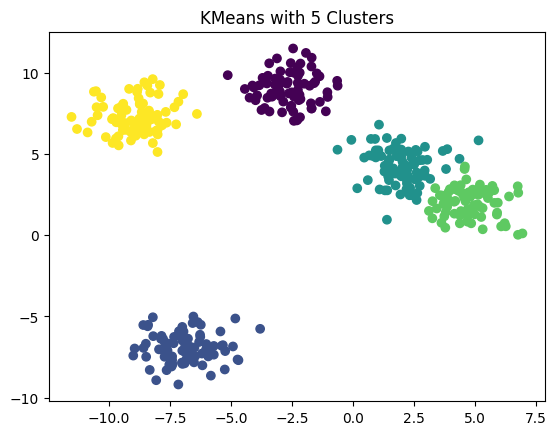

In [8]:
# Q1. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score.
# Answer:This experiment demonstrates how KMeans clusters synthetic data and how Silhouette Score evaluates clustering quality. A higher Silhouette Score indicates well-separated clusters.

# Code:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
X, _ = make_blobs(n_samples=400, centers=5, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("KMeans with 5 Clusters")
plt.show()

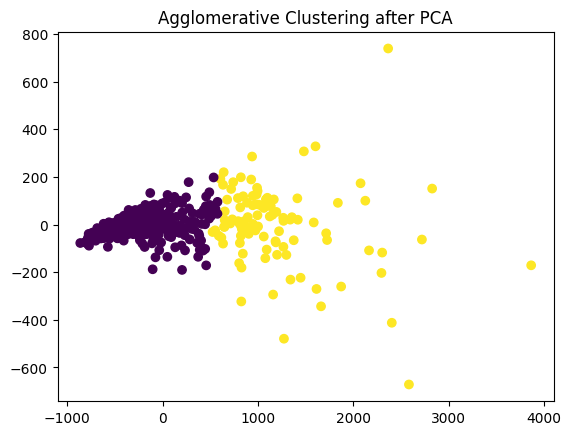

In [9]:
#Q2. Load the Breast Cancer dataset, apply PCA, and Agglomerative Clustering.
# Answer:PCA reduces high-dimensional data into 2D, making visualization easier. Agglomerative clustering groups similar samples hierarchically.

# Code:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Agglomerative Clustering after PCA")
plt.show()

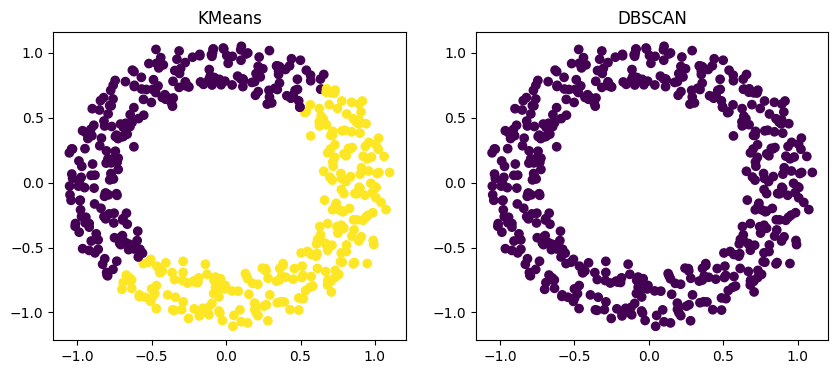

In [10]:
# Q3. Generate noisy circular data and compare KMeans vs DBSCAN.
# Answer:KMeans struggles with non-spherical data, whereas DBSCAN can detect circular clusters and noise effectively.

# Code:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, noise=0.05)

kmeans = KMeans(n_clusters=2)
k_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.2)
d_labels = dbscan.fit_predict(X)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=k_labels)
plt.title("KMeans")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=d_labels)
plt.title("DBSCAN")

plt.show()

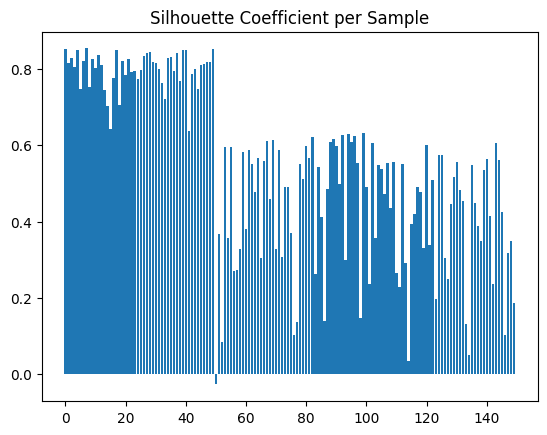

In [11]:
#Q4. Load Iris dataset and plot Silhouette Coefficient for each sample.
# Answer:This visualizes how well each data point fits within its assigned cluster.

# Code:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

X = load_iris().data

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

sil_values = silhouette_samples(X, labels)

plt.bar(range(len(sil_values)), sil_values)
plt.title("Silhouette Coefficient per Sample")
plt.show()


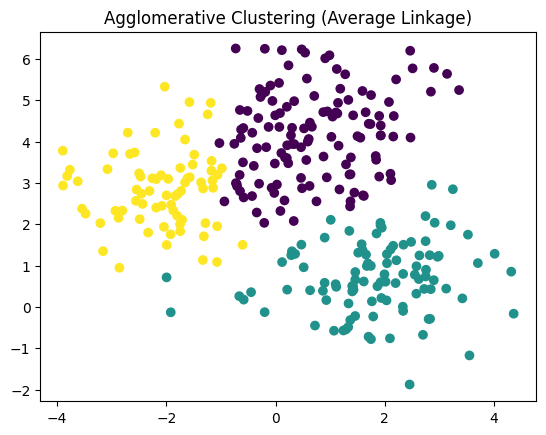

In [12]:
# Q5. Generate blobs and apply Agglomerative Clustering with average linkage.
# Answer:Average linkage considers average distance between clusters, producing balanced merges.

# Code:
X, _ = make_blobs(n_samples=300, centers=3, random_state=0)

agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()

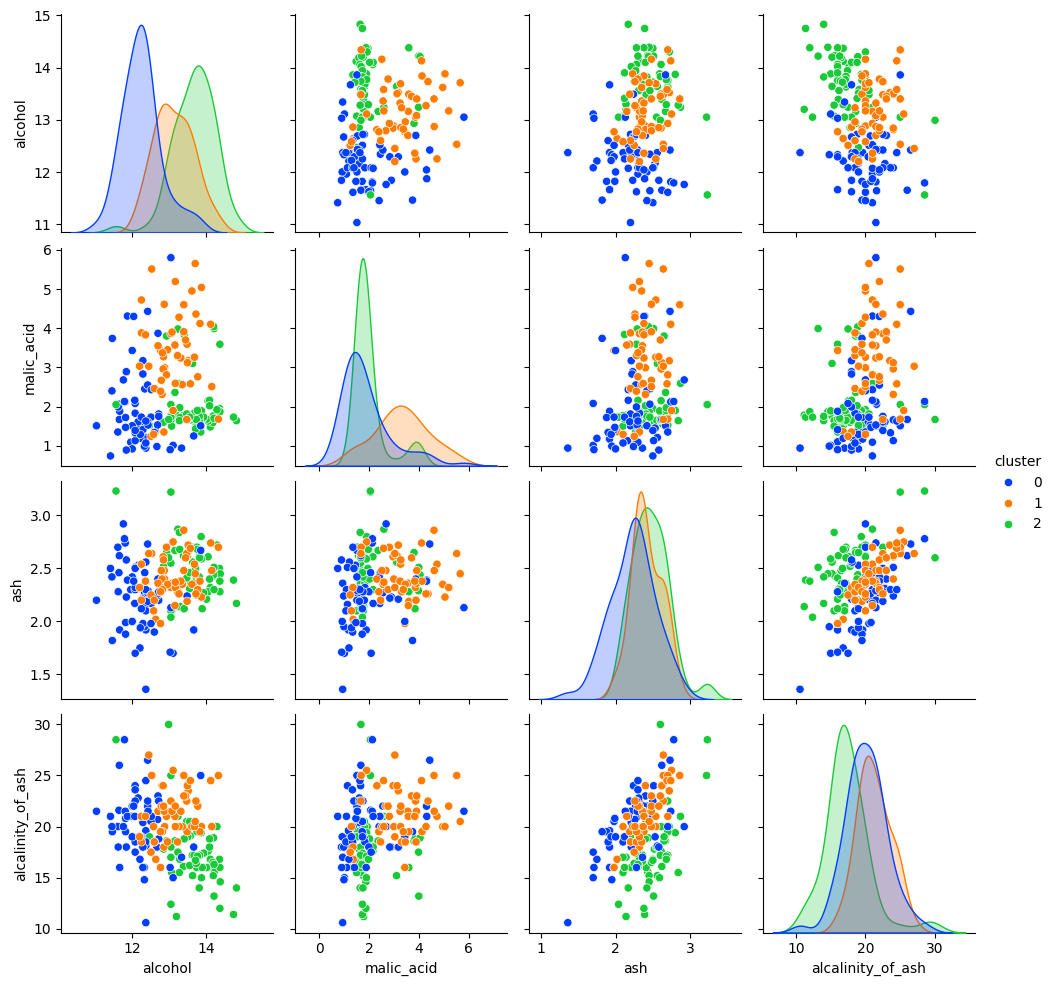

In [14]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Added for better accuracy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2. Scale the data (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Apply KMeans
# We use 3 clusters because the wine dataset has 3 known types
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(scaled_data)

# 4. Visualize using Pairplot
# We'll take the first 4 features plus the cluster column
cols_to_plot = list(df.columns[:4]) + ['cluster']
sns.pairplot(df[cols_to_plot], hue='cluster', palette='bright')
plt.show()

Noise points: 110


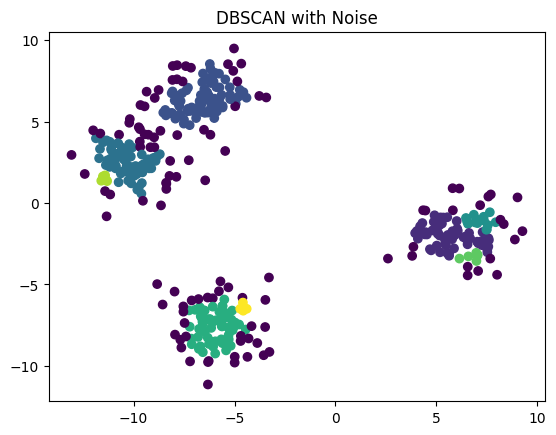

In [15]:
#Q7. Generate noisy blobs and identify noise using DBSCAN.
#Answer:DBSCAN detects both dense clusters and noise points.

# Code:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.2)

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

noise = list(labels).count(-1)
print("Noise points:", noise)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN with Noise")
plt.show()

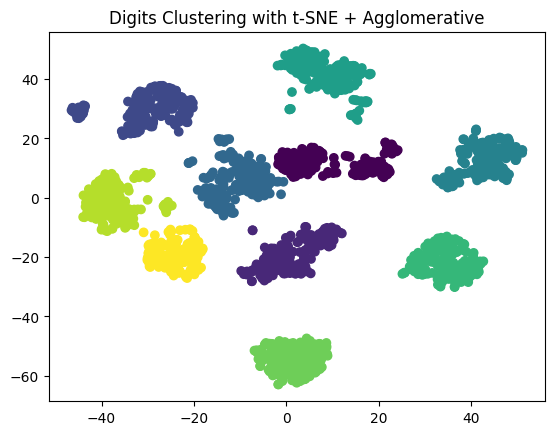

In [16]:
#Q8. Load Digits dataset, apply t-SNE, then Agglomerative Clustering.
# Answer:t-SNE reduces dimensionality while preserving structure, making clustering visible.

# Code:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X = digits.data

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.title("Digits Clustering with t-SNE + Agglomerative")
plt.show()

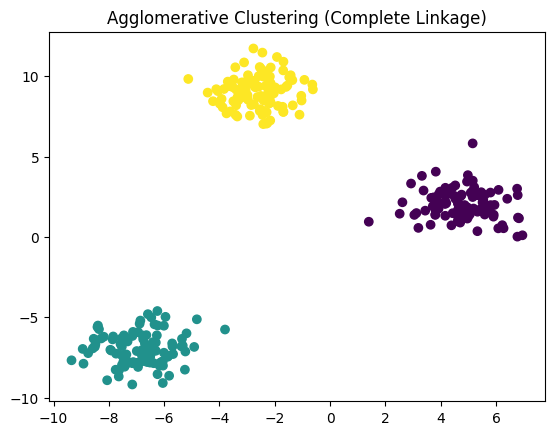

In [17]:
#Q9. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage.
# Answer:Complete linkage considers the maximum distance between cluster points, producing compact clusters.

# Code:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

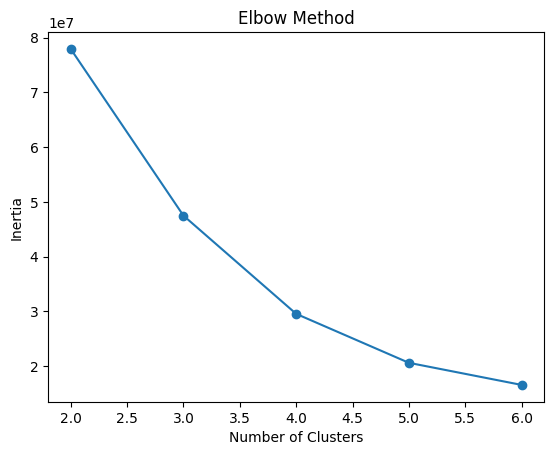

In [18]:
#Q10. Load Breast Cancer dataset and compare inertia for K=2 to K=6.
 #Answer:This experiment uses inertia to evaluate how cluster compactness changes with K.

# Code:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = load_breast_cancer().data

inertia = []
K = range(2,7)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

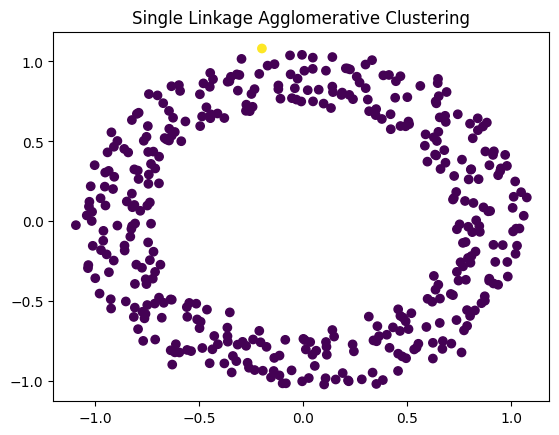

In [19]:
#Q11. Generate concentric circles and cluster using Agglomerative Clustering (single linkage).
# Answer:Single linkage connects clusters using minimum distance, suitable for chained structures.

# Code:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=400, noise=0.05)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Single Linkage Agglomerative Clustering")
plt.show()

In [20]:
#Q12. Use Wine dataset, apply DBSCAN after scaling, and count clusters.
# Answer:Scaling is necessary before DBSCAN to ensure distance consistency.

# Code:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X = load_wine().data
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_scaled)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", clusters)

Number of clusters: 0


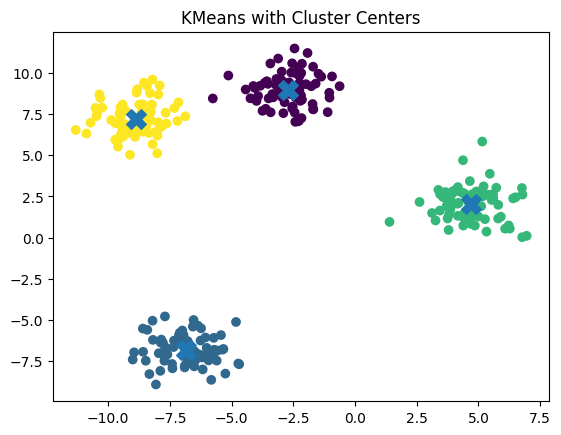

In [21]:
#Q13. Generate blobs and apply KMeans. Plot cluster centers.
# Answer:Cluster centers represent the mean position of points in each cluster.

# Code:
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, marker='X')
plt.title("KMeans with Cluster Centers")
plt.show()

In [22]:
#Q14. Load Iris dataset, apply DBSCAN, and print noise samples.
# Answer:DBSCAN identifies samples that do not belong to any cluster as noise.

# Code:
from sklearn.datasets import load_iris

X = load_iris().data
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

noise = list(labels).count(-1)
print("Noise samples:", noise)

Noise samples: 34


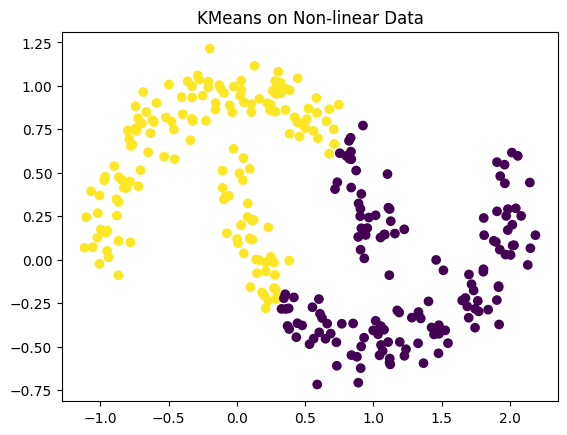

In [23]:
#Q15. Generate non-linear data using make_moons and apply KMeans.
# Answer:KMeans struggles with non-linearly separable data.

# Code:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.1)

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("KMeans on Non-linear Data")
plt.show()

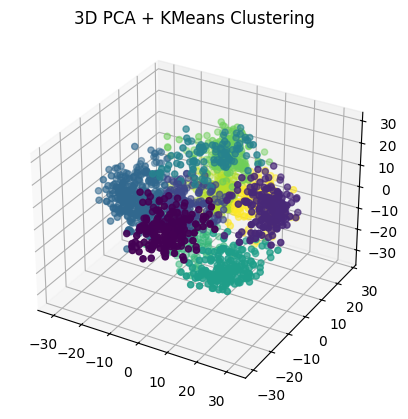

In [24]:
#Q16. Load Digits dataset, apply PCA (3 components), and visualize in 3D.
# Answer:PCA reduces dimensions while preserving variance, enabling 3D visualization.

# Code:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels)
ax.set_title("3D PCA + KMeans Clustering")
plt.show()

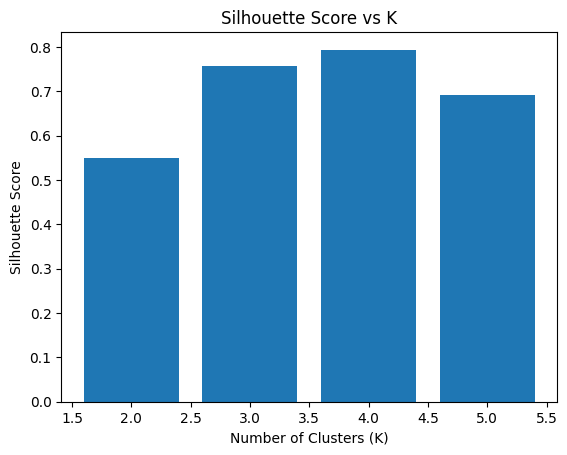

In [25]:
#Q17. Create synthetic data using make_blobs and evaluate Silhouette Scores for k = 2 to 5. Display as bar chart.
# Answer:This experiment evaluates how cluster quality changes with different values of K using Silhouette Score.

# Code:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, random_state=42)

scores = []
K = range(2,6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(K, scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()

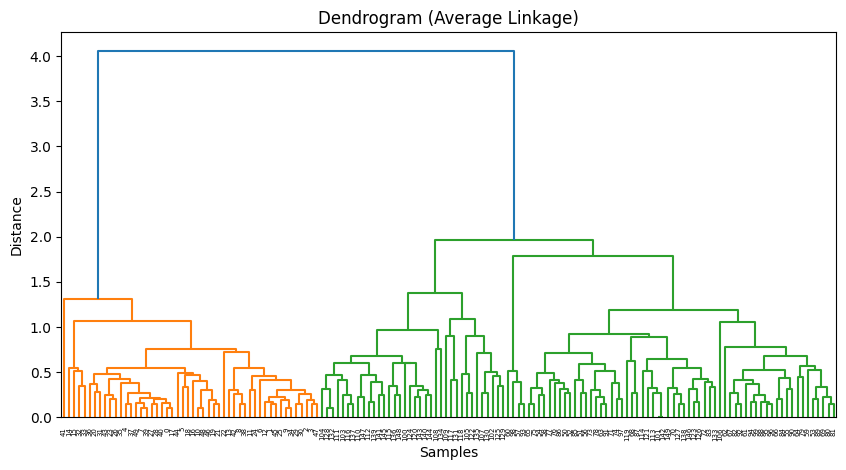

In [26]:
#Q18. Load Iris dataset and apply hierarchical clustering. Plot dendrogram with average linkage.
# Answer:Dendrogram visually represents hierarchical cluster formation using average linkage.

#Code:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = load_iris().data

Z = linkage(X, method='average')

plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

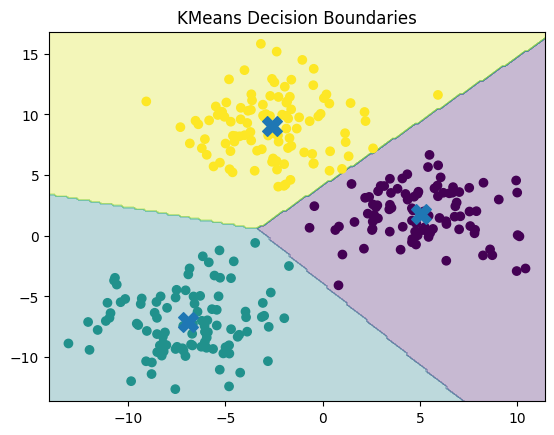

In [27]:
#Q19. Generate overlapping clusters and apply KMeans. Visualize decision boundaries.
# Answer:Decision boundaries show how KMeans partitions feature space.

# Code:
import numpy as np
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min,x_max,200),
                     np.linspace(y_min,y_max,200))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, marker='X')
plt.title("KMeans Decision Boundaries")
plt.show()

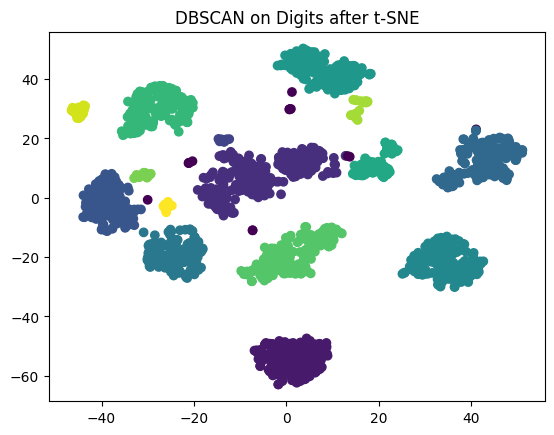

In [28]:
#Q20. Load Digits dataset, apply DBSCAN after t-SNE, and visualize clusters.
# Answer:t-SNE reduces dimensionality while preserving structure, improving DBSCAN clustering.

#Code:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

digits = load_digits()
X = digits.data

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

db = DBSCAN(eps=3, min_samples=5)
labels = db.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.title("DBSCAN on Digits after t-SNE")
plt.show()

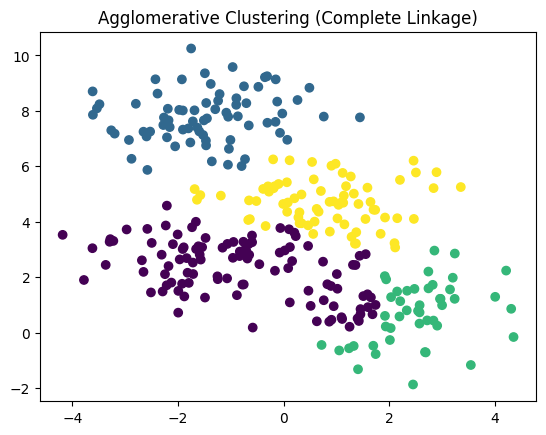

In [29]:
#Q21. Generate blobs and apply Agglomerative Clustering with complete linkage. Plot result.
# Answer:Complete linkage ensures compact clusters by considering maximum distances.

# Code:
X, _ = make_blobs(n_samples=300, centers=4, random_state=0)

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

In [30]:
#Q22. Load Iris dataset and count noise samples after DBSCAN.
# Answer:DBSCAN labels outliers as noise (-1).

# Code:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = load_iris().data
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X_scaled)

noise = list(labels).count(-1)
print("Noise samples:", noise)

Noise samples: 26


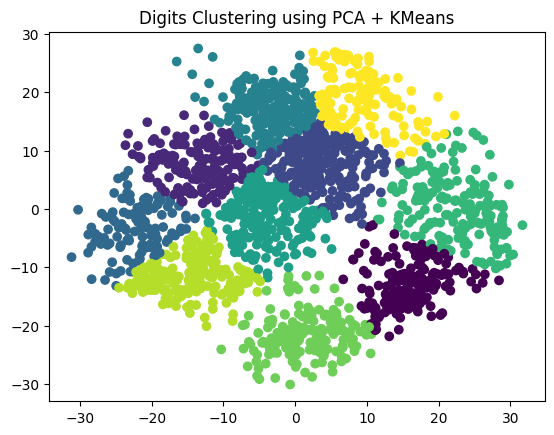

In [31]:
#Q23. Load Digits dataset, apply PCA (2D), and visualize KMeans clusters.
# Answer:PCA simplifies high-dimensional data while preserving major variance.

#Code:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data

X_pca = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Digits Clustering using PCA + KMeans")
plt.show()

In [32]:
#Q24. Load the Iris dataset and use Agglomerative Clustering. Display first 10 predicted labels.
# Answer:Agglomerative clustering groups samples hierarchically. Printing predicted labels helps verify cluster assignment.

# Code:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X = load_iris().data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("First 10 predicted labels:", labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


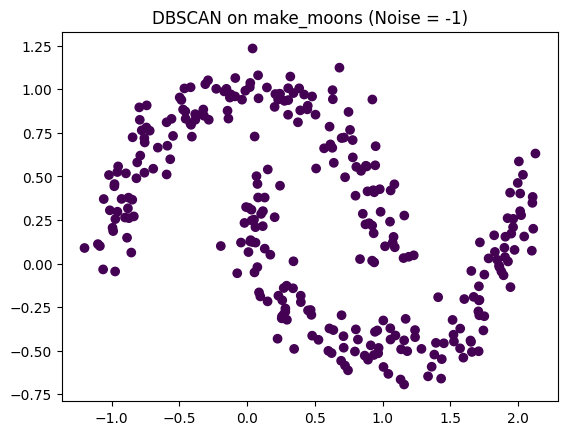

In [33]:
#Q25. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers.
# Answer:DBSCAN can identify arbitrarily shaped clusters and explicitly mark noise points.

# Code:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1)

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN on make_moons (Noise = -1)")
plt.show()

In [34]:
#Q26. Load Wine dataset, standardize features, apply KMeans, and print size of each cluster.
# Answer:Standardization ensures fair distance computation before KMeans clustering.

# Code:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

X = load_wine().data
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


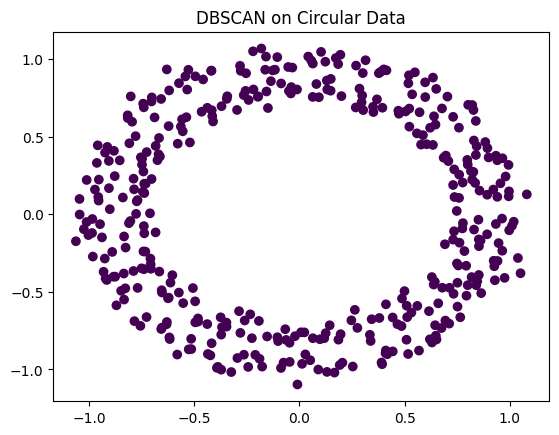

In [35]:
#Q27. Use make_circles to generate data and cluster using DBSCAN.
# Answer:DBSCAN is well-suited for detecting circular and non-linear clusters.

# Code:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=400, noise=0.05)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN on Circular Data")
plt.show()

In [36]:
#Q28. Load Breast Cancer dataset, apply MinMaxScaler, and use KMeans (2 clusters). Output centroids.
# Answer:MinMax scaling brings all features into the same range, improving clustering accuracy.

# Code:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

X = load_breast_cancer().data
X_scaled = MinMaxScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

print("Cluster Centroids:\n", kmeans.cluster_centers_)

Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


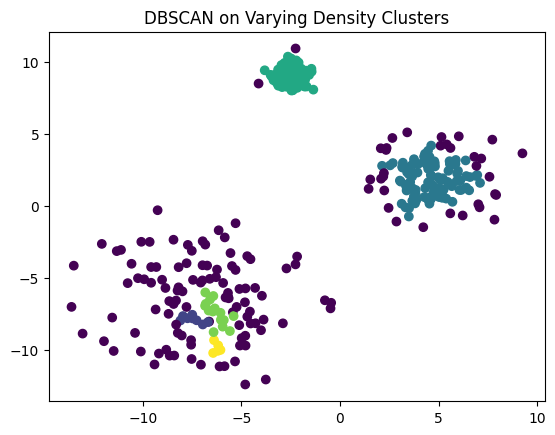

In [37]:
#Q29. Generate blobs with varying cluster standard deviations and cluster with DBSCAN.
# Answer:DBSCAN handles clusters with different densities better than KMeans.

# Code:
X, _ = make_blobs(n_samples=400, centers=3,
                  cluster_std=[0.5, 1.5, 2.5],
                  random_state=42)

db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN on Varying Density Clusters")
plt.show()

# Conclusion:

In this assignment, various clustering techniques such as K-Means, DBSCAN, and Hierarchical Clustering were explored using both real-world and synthetic datasets.
Different preprocessing techniques like StandardScaler, MinMaxScaler, PCA, and t-SNE were applied to improve clustering performance.
Evaluation metrics such as Inertia and Silhouette Score helped in understanding cluster quality.
Overall, this assignment demonstrates how clustering algorithms behave under different data distributions and shapes.